In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("data/route1processeddata.csv")

In [3]:
# s = data.sample(frac=1)
data.describe()

,Year,Month,Day,Hour,DBT,RelHum,WSp,Precipitation,Elev,utcivar1,utcivar2,utcivar3,count,Dockability,Releasability,specialdate
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,16093.000000,16093.000000,26280.000000
mean,2018.000000,6.526027,15.720548,11.500000,11.555811,64.517161,5.043877,0.147964,15.018772,6.249769,2.729696,2.691014,0.505746,0.984495,0.730715,0.491324
std,0.816512,3.447917,8.796414,6.922318,10.026865,20.459736,2.472160,0.821503,19.877266,15.407218,16.193476,16.161064,1.155532,0.100187,0.391920,0.499934
min,2017.000000,1.000000,1.000000,0.000000,-18.900000,8.000000,0.000000,0.000000,0.000000,-49.658875,-52.092160,-52.092160,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,4.000000,8.000000,5.750000,3.300000,48.000000,3.100000,0.000000,0.000000,-4.721006,-9.226167,-9.233860,0.000000,1.000000,0.450000,0.000000
50%,2018.000000,7.000000,16.000000,11.500000,11.700000,65.000000,4.600000,0.000000,0.892818,7.640638,3.697498,3.668930,0.000000,1.000000,1.000000,0.000000
75%,2019.000000,10.000000,23.000000,17.250000,20.000000,82.000000,6.700000,0.000000,27.283600,18.841994,16.160696,16.120020,0.000000,1.000000,1.000000,1.000000
max,2019.000000,12.000000,31.000000,23.000000,36.100000,100.000000,21.600000,7.000000,70.856079,40.093279,38.881728,38.590205,13.000000,1.000000,1.000000,1.000000


In [4]:
# I thought precipitation was a categorical variable?
sum(data['Precipitation'] == 7)

9

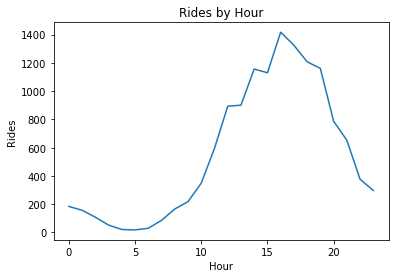

In [5]:
r_by_hour = data.groupby('Hour').agg({'count':'sum'})
plt.plot(r_by_hour)
plt.title('Rides by Hour')
plt.xlabel('Hour')
plt.ylabel('Rides');

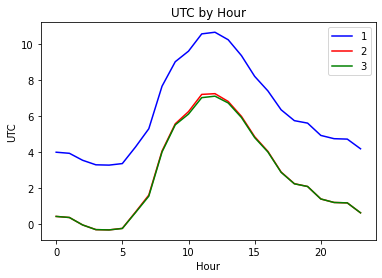

In [6]:
u_by_hour = data.groupby('Hour').agg({'utcivar1':'mean','utcivar2':'mean','utcivar3':'mean'})
plt.plot(u_by_hour['utcivar1'],c='b')
plt.plot(u_by_hour['utcivar2'],c='r')
plt.plot(u_by_hour['utcivar3'],c='g');
plt.title('UTC by Hour')
plt.xlabel('Hour')
plt.ylabel('UTC')
plt.legend(labels=['1','2','3'])

Text(0, 0.5, 'Rides')

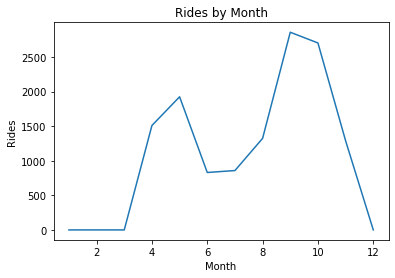

In [7]:
by_month = data.groupby('Month').agg({'count':'sum'})
plt.plot(by_month)
plt.title('Rides by Month')
plt.xlabel('Month')
plt.ylabel('Rides')

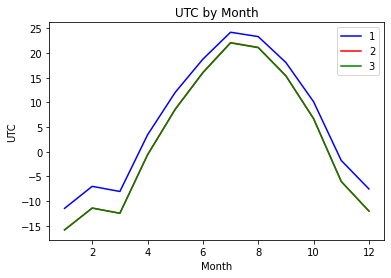

In [8]:
u_by_month = data.groupby('Month').agg({'utcivar1':'mean','utcivar2':'mean','utcivar3':'mean'})
plt.plot(u_by_month['utcivar1'],c='b')
plt.plot(u_by_month['utcivar2'],c='r')
plt.plot(u_by_month['utcivar3'],c='g');
plt.title('UTC by Month')
plt.xlabel('Month')
plt.ylabel('UTC')
plt.legend(labels=['1','2','3'])

(array([  57.,  321.,  931., 2368., 4151., 4604., 4564., 5493., 3269.,
         522.]),
 array([-52.09216   , -43.02392352, -33.95568703, -24.88745055,
        -15.81921407,  -6.75097758,   2.3172589 ,  11.38549538,
         20.45373187,  29.52196835,  38.59020483]),
 <BarContainer object of 10 artists>)

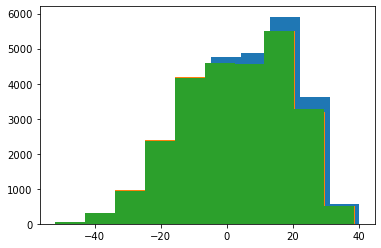

In [9]:
# All have the same distribution
plt.hist(data['utcivar1'])
plt.hist(data['utcivar2'])
plt.hist(data['utcivar3'])

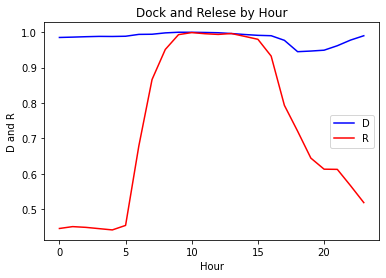

In [10]:
# D = at least 10% full
# R = at least 15% empty

dr_by_hour = data.groupby('Hour').agg({'Dockability':'mean','Releasability':'mean'})
plt.plot(dr_by_hour['Dockability'],c='b')
plt.plot(dr_by_hour['Releasability'],c='r')
plt.title('Dock and Relese by Hour')
plt.xlabel('Hour')
plt.ylabel('D and R')
plt.legend(labels=['D','R'])

In [11]:
test = data.copy()

In [12]:
# Attempting to create lag variable
test.set_index(["DateTime"]).shift(1).head(6)

,Year,Month,Day,Hour,DBT,RelHum,WSp,Precipitation,Elev,utcivar1,utcivar2,utcivar3,count,Dockability,Releasability,specialdate
DateTime,,,,,,,,,,,,,,,,
1/1/2000 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2000 1:00,2017.0,1.0,1.0,0.0,3.9,89.0,6.2,0.0,0.0,-8.483754,-12.490996,-12.490996,0.0,NaN,NaN,1.0
1/1/2000 2:00,2017.0,1.0,1.0,1.0,3.9,89.0,6.2,0.0,0.0,-8.483754,-12.490996,-12.490996,0.0,NaN,NaN,1.0
1/1/2000 3:00,2017.0,1.0,1.0,2.0,2.8,92.0,6.2,0.0,0.0,-10.088523,-14.110906,-14.110906,0.0,NaN,NaN,1.0
1/1/2000 4:00,2017.0,1.0,1.0,3.0,2.8,92.0,7.2,0.0,0.0,-12.381234,-16.323213,-16.323213,0.0,NaN,NaN,1.0
1/1/2000 5:00,2017.0,1.0,1.0,4.0,2.8,92.0,7.7,0.0,0.0,-13.423521,-17.330211,-17.330211,0.0,NaN,NaN,1.0


Modeling Decisons:
Bin rain into low medium high categorical variable
Drop Jan / Feb data because of construction 
DBT appears pretty correlated with all UTCs, maybe unnesscary 